In [172]:
using BenchmarkTools
using Plots

include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

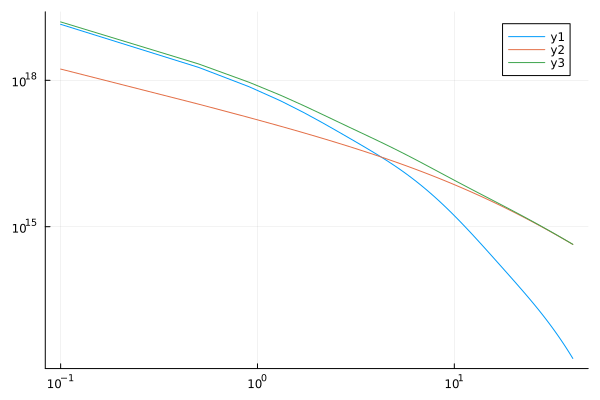

In [78]:
r = range(0.1, 40, 100)
plot(r, cj.ρ_baryons_spherical.(1e-3 .* r), xscale=:log10, yscale=:log10)
plot!(r, cj.ρ_halo.(1e-3 .* r, cj.host_halo()), xscale=:log10, yscale=:log10)
plot!(r, cj.ρ_host_spherical.(1e-3 .* r), xscale=:log10, yscale=:log10)

In [10]:
cj.lookback_redshift(1e+10 * 3600 * 24 * 365.25)

1.7033721577909982

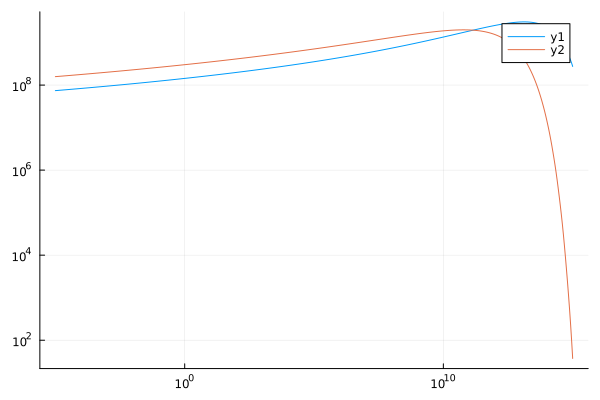

In [13]:
m = 10 .^(range(-5,stop=15,length=500))
plot(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 1.7, cj.SharpK, cj.PressSchechter), xscale=:log10, yscale=:log10)

In [77]:
halo =  cj.halo_from_mΔ_and_cΔ(cj.nfwProfile, 1e+10, 10)
@benchmark cj.jacobi_scale(1e-2, halo, ρ_h(1e-2), m_h(1e-2))

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  12.458 μs … 109.208 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     13.041 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   13.192 μs ±   3.287 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▅▅  █▅                                                        
  ██▃▂██▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▁▁▂▂▂▂▁▂▂▂▁▂▂▂▂▂▂▂▂ ▃
  12.5 μs         Histogram: frequency by time         20.2 μs <

 Memory estimate: 112 bytes, allocs estimate: 7.

In [19]:
cj._save_host(cj.MM17Gamma1)

true

In [ ]:
ρ_h, ρ_b, m_h, _ = cj._load_host(cj.MM17Gamma1)


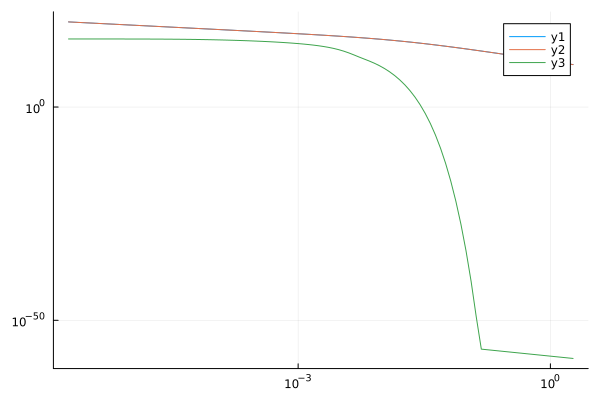

In [60]:
rs = cj.host_halo(cj.MM17Gamma1).rs
r_array = 10.0.^range(log10(1e-4 * rs), log10(1e+2 * rs), 100)
plot(r_array, cj.ρ_host_spherical.(r_array, cj.MM17Gamma1), xscale=:log10, yscale=:log10)
plot!(r_array, ρ_h.(r_array), xscale=:log10, yscale=:log10)
plot!(r_array, ρ_b.(r_array), xscale=:log10, yscale=:log10)

#ρ_b.(r_array)

In [67]:
import Unitful: km, s, Gyr, K, Myr
import UnitfulAstro: kpc, Mpc, Gpc, Msun
using Unitful

#cj.lookback_redshift((1e+4 * (Myr / s) |> NoUnits))
#cj.age_host()

println(cj.number_circular_orbits( 1e-3 ))
println(cj.ρ_baryons(1e-3, 5e-4, cj.MM17Gamma1)*1e-9)
println(cj.ρ_ISM(1e-3, 5e-4, cj.MM17Gamma1)*1e-9)
println(cj.ρ_HI(1e-3, 5e-4, cj.MM17Gamma1)*1e-9)
println(cj.ρ_H2(1e-3, 5e-4, cj.MM17Gamma1)*1e-9)
println(cj.ρ_dm(1e-3, cj.MM17Gamma1)*1e-9)
println(cj.ρ_baryons_spherical(1e-4, cj.MM17Gamma1)*1e-9)
println(cj.m_baryons_spherical(8e-3, cj.MM17Gamma1))
println(cj.circular_velocity(1e-3))

266
5.081234844636314e8
27504.249283827667
27501.965403636463
2.2838801912036857
1.5484339025406078e8
1.405114652434154e10
4.617905850872992e10
163.81361874826106


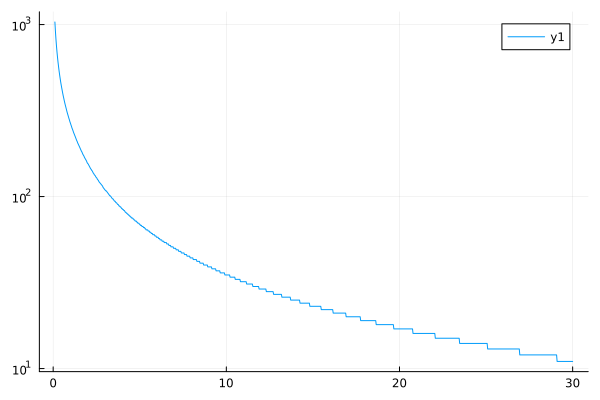

In [80]:
r = range(0.1, 30, 1000)
plot(r, cj.number_circular_orbits.(1e-3 .* r), yscale=:log10)

In [170]:
cj.moments_C03(0)

0.10154635225965543

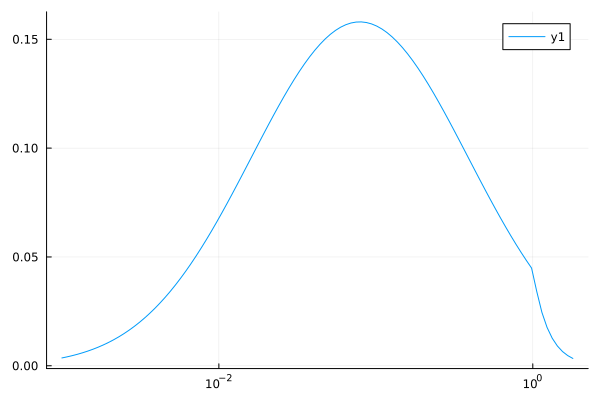

In [173]:
m_array = 10.0.^range(-3, log10(1.80), 100)
plot(m_array, cj.stellar_mass_function_C03.(m_array), xscale=:log10)